In [1]:
using Pkg
Pkg.add("NBInclude")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %12.5 %>                             ]  25.1 %Fetching: [================>                        ]  37.6 %>                   ]  50.0 % [==========================>              ]  62.6 %75.0 %79.8 %=====================================>   ]  92.3 % Resolving package versions...
 Installed OffsetArrays ─ v0.9.1
 Installed NBInclude ──── v2.1.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [0db19996] + NBInclude v2.1.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [0db19996] + NBInclude v2.1.0
  [6fe1bfb0] ↑ OffsetArrays v0.9.0 ⇒ v0.9.1


In [2]:
using NBInclude

┌ Info: Precompiling NBInclude [0db19996-df87-5ea3-a455-e3a50d440464]
└ @ Base loading.jl:1186


In [306]:
@nbinclude("quantum_electrodynamical_ground_state_calculator_routines_and_how_to.ipynb")

photonic(10000, 3, [1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7  …  0.000759935, 0.000759935, 0.000759935, 0.000759935, 0.000759935, 0.000759935, 0.000759935, 0.000759935, 0.000759935, 0.000759935], Complex{Float64}[0.0+0.0im 0.0+0.0im … 3.76236e-8+0.0im 3.85377e-8+0.0im; 0.0+0.0im 0.0+0.0im … -9.6601e-9+0.0im -4.86844e-9+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+3.8844e-8im 0.0+3.8844e-8im])

## Example I: Finding the changes in electromagnetic field response due to strong coupling with a single emitter

In [13]:
N_el = 200;
electron_1d = construct_matter(zeros(N_el),0.25*ev_hartree,5,N_el)

N_cav = 100;
d_cav = 1; # spatial dimension of the cavity mode, corresponds to number of vector components used to describe mode 
L_cav = 18904.0; # 1 micron in atomic units
S_cav = (10.0*nm)^2; #area of cavity

emitter_pos = L_cav/2; # position where the emitter is located

freqs_cav = pi*(1:N_cav)*c/L_cav;
modes_cav = zeros(d_cav,N_cav);
for counter = 1:N_cav
   modes_cav[1,counter] = sqrt(2.0/L_cav/S_cav)*sin(freqs_cav[counter]*emitter_pos/c); # for 2d or 3d, want two extra lines specifying those components 
end

pt_cav = photonic(N_cav,d_cav,freqs_cav,modes_cav)

sample_ωs = 0:1e-3:2.5;
green_cav = [green!(1,1,ω,pt_cav) for ω in sample_ωs];

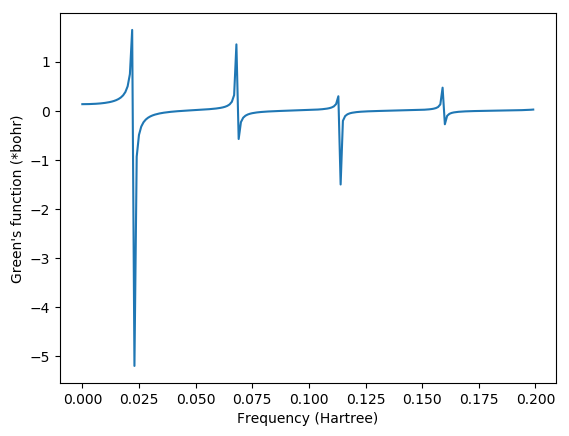

PyObject Text(24.000000000000007, 0.5, "Green's function (*bohr)")

In [18]:
plot(sample_ωs[1:200],green_cav[1:200])
xlabel("Frequency (Hartree)")
ylabel("Green's function (*bohr)")

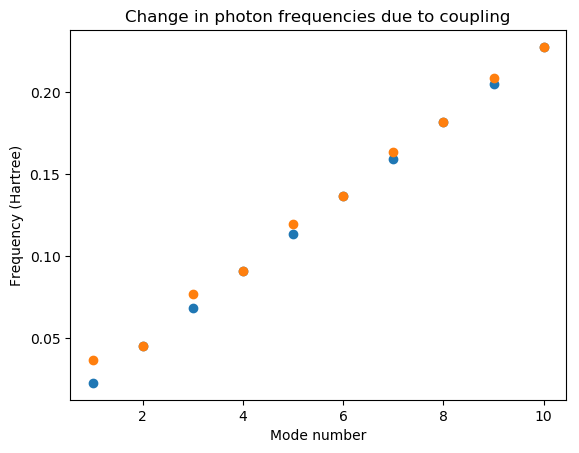

PyObject Text(0.5, 1.0, 'Change in photon frequencies due to coupling')

In [32]:
weight = 40000*qe^2/me/ϵ0/c^2;
freqs_int = construct_coupled_freqs(pt_cav,weight);
plot(1:10,freqs_bare[1:10],1:10,freqs_int[1:10],marker="o",linewidth=0)
xlabel("Mode number")
ylabel("Frequency (Hartree)")
title("Change in photon frequencies due to coupling")

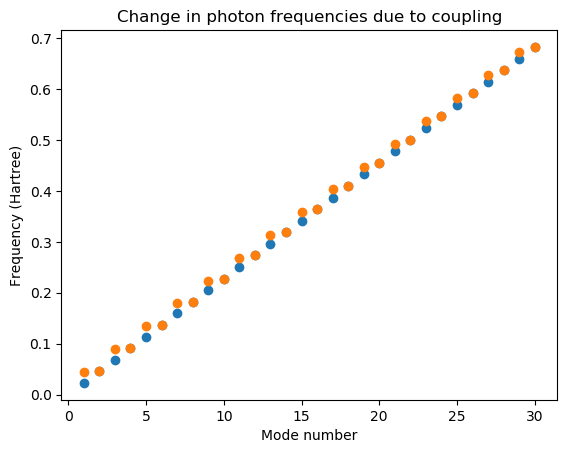

PyObject Text(0.5, 1.0, 'Change in photon frequencies due to coupling')

In [41]:
weight = 500000*qe^2/me/ϵ0/c^2;
freqs_int = construct_coupled_freqs(pt_cav,weight);
plot(1:30,freqs_bare[1:30],1:30,freqs_int[1:30],marker="o",linewidth=0)
xlabel("Mode number")
ylabel("Frequency (Hartree)")
title("Change in photon frequencies due to coupling")

In [60]:
# setting a cavity mode with position dependence

N_cav = 100;
Npts_cav = 1000;
d_cav = 1;
L_cav = 18904.0; # may want to set basic unit in other routines to L_cav if I want.

freqs_cav = pi*(1:N_cav)*c/L_cav;
positions_cav = 0:L_cav/Npts_cav:L_cav;
num_positions_cav = size(positions_cav,1);
modes_cav = zeros(num_positions_cav,N_cav,d_cav);
for counter = 1:size(modes_cav,2)
   modes_cav[:,counter,1] = sqrt(2.0/L_cav)*sin.(freqs_cav[counter]*positions_cav/c); #the last argument 1 is hard-coded in  
end

pt_cav = photonic(N_cav,d_cav,freqs_cav,modes_cav)

photonic(100, 1, [0.0227676, 0.0455351, 0.0683027, 0.0910703, 0.113838, 0.136605, 0.159373, 0.182141, 0.204908, 0.227676  …  2.07185, 2.09462, 2.11738, 2.14015, 2.16292, 2.18569, 2.20845, 2.23122, 2.25399, 2.27676], [0.0 0.0 … 0.0 0.0; 3.23137e-5 6.46272e-5 … 0.00314774 0.00317849; … ; 3.23137e-5 -6.46272e-5 … 0.00314774 -0.00317849; 1.25965e-18 -2.51929e-18 … -1.31092e-16 2.02053e-17])

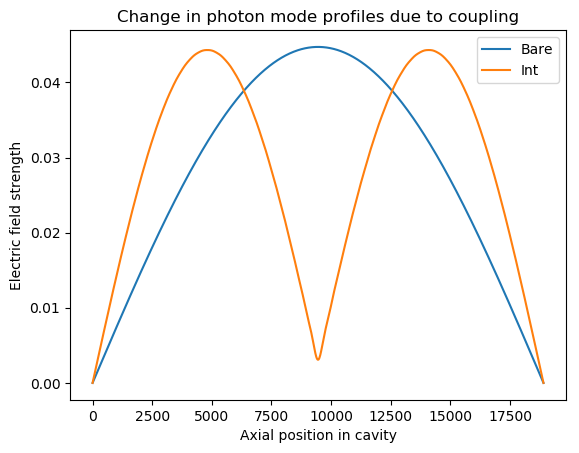

PyObject <matplotlib.legend.Legend object at 0x7f95b7fd9438>

In [69]:
plot(positions_cav,-mode(freqs_bare[1]),positions_cav,-mode(freqs_int[1]))
xlabel("Axial position in cavity")
ylabel("Electric field strength")
title("Change in photon mode profiles due to coupling")
legend(["Bare","Int"])

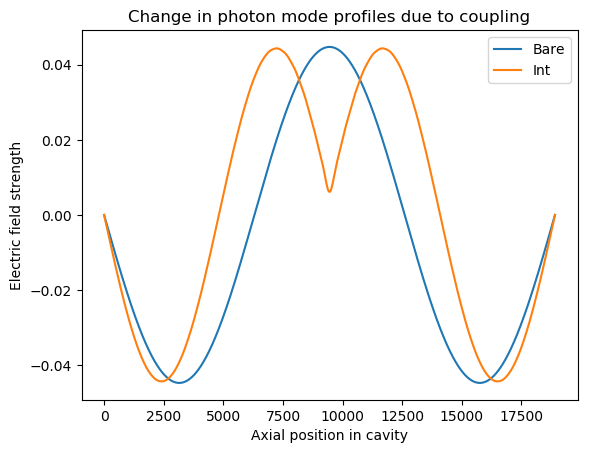

PyObject <matplotlib.legend.Legend object at 0x7f95b7b100f0>

In [72]:
plot(positions_cav,-mode(freqs_bare[3]),positions_cav,-mode(freqs_int[3]))
xlabel("Axial position in cavity")
ylabel("Electric field strength")
title("Change in photon mode profiles due to coupling")
legend(["Bare","Int"])

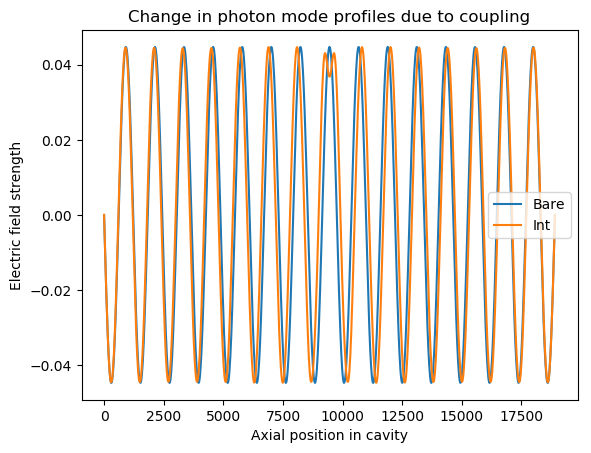

PyObject <matplotlib.legend.Legend object at 0x7f95b78884a8>

In [78]:
plot(positions_cav,-mode(freqs_bare[31]),positions_cav,-mode(freqs_int[31]))
xlabel("Axial position in cavity")
ylabel("Electric field strength")
title("Change in photon mode profiles due to coupling")
legend(["Bare","Int"])

## Example II: Finding the self-consistent change in the electron energy levels due to coupling with quantized electromagnetic fields. 

#### I: With a cavity

In [89]:
# photon
N_cav = 100;
d_cav = 1; # spatial dimension of the cavity mode, corresponds to number of vector components used to describe mode 
L_cav = 18904.0; # 1 micron in atomic units
S_cav = (10.0*nm)^2; #area of cavity

emitter_pos = L_cav/2; # position where the emitter is located

freqs_cav = pi*(1:N_cav)*c/L_cav;
modes_cav = zeros(d_cav,N_cav);
for counter = 1:N_cav
   modes_cav[1,counter] = sqrt(2.0/L_cav/S_cav)*sin(freqs_cav[counter]*emitter_pos/c); # for 2d or 3d, want two extra lines specifying those components 
end

pt_cav = photonic(N_cav,d_cav,freqs_cav,modes_cav)

# electron
N_el = 4;
electron_1d = construct_matter(zeros(N_el),0.25*ev_hartree,5,N_el)

# initializing parameters
E = electron_1d;
X0 = E.X
P = pt_cav;

#### Interaction strengths where the iterates converge rapidly and easily

In [91]:
str = 1;
sol_el= fixedpoint(f_el2!, X0; method = :anderson, m=0,beta=1.0,iterations=100);

[-0.0148064, -0.00565678, 0.00565768, 0.0148133] 
[-0.0148064, -0.00565678, 0.00565768, 0.0148133] 
[-0.0148064, -0.00565678, 0.00565768, 0.0148133] 


In [93]:
str = 100;
sol_el= fixedpoint(f_el2!, X0; method = :anderson, m=0,beta=1.0,iterations=100);

[-0.0143492, -0.00560667, 0.00569666, 0.0150416] 
[-0.0143492, -0.00560612, 0.00569698, 0.0150424] 
[-0.0143492, -0.00560612, 0.00569698, 0.0150424] 
[-0.0143492, -0.00560612, 0.00569698, 0.0150424] 
[-0.0143492, -0.00560612, 0.00569698, 0.0150424] 
[-0.0143492, -0.00560612, 0.00569698, 0.0150424] 
[-0.0143492, -0.00560612, 0.00569698, 0.0150424] 


In [179]:
str = 1000;
sol_el= fixedpoint(f_el2!, X0; method = :anderson, m=0,beta=1.0,iterations=100);

[-0.0101936, -0.0051511, 0.00605098, 0.0171173] 
[-0.0101936, -0.00508895, 0.00608577, 0.0172037] 
[-0.0101936, -0.00509002, 0.00608545, 0.0172003] 
[-0.0101936, -0.00509, 0.00608545, 0.0172004] 
[-0.0101936, -0.00509, 0.00608545, 0.0172004] 
[-0.0101936, -0.00509, 0.00608545, 0.0172004] 
[-0.0101936, -0.00509, 0.00608545, 0.0172004] 
[-0.0101936, -0.00509, 0.00608545, 0.0172004] 
[-0.0101936, -0.00509, 0.00608545, 0.0172004] 
[-0.0101936, -0.00509, 0.00608545, 0.0172004] 


In [180]:
str = 10000;
sol_el= fixedpoint(f_el2!, X0; method = :anderson, m=0,beta=1.0,iterations=100);

[-0.000595386, 0.00959421, 0.0313629, 0.0378742] 
[0.00107939, 0.00744818, 0.010586, 0.0351307] 
[0.00107939, 0.0106729, 0.0226441, 0.036402] 
[0.00107939, 0.0106616, 0.011624, 0.0360179] 
[0.00107939, 0.0106631, 0.01867, 0.0361323] 
[0.00107939, 0.0106629, 0.0137465, 0.0360981] 
[0.00107939, 0.0106629, 0.0169925, 0.0361083] 
[0.00107939, 0.0106629, 0.014765, 0.0361052] 
[0.00107939, 0.0106629, 0.0162533, 0.0361062] 
[0.00107939, 0.0106629, 0.0152406, 0.0361059] 
[0.00107939, 0.0106629, 0.0159213, 0.036106] 
[0.00107939, 0.0106629, 0.0154599, 0.0361059] 
[0.00107939, 0.0106629, 0.0157709, 0.0361059] 
[0.00107939, 0.0106629, 0.0155605, 0.0361059] 
[0.00107939, 0.0106629, 0.0157025, 0.0361059] 
[0.00107939, 0.0106629, 0.0156065, 0.0361059] 
[0.00107939, 0.0106629, 0.0156713, 0.0361059] 
[0.00107939, 0.0106629, 0.0156275, 0.0361059] 
[0.00107939, 0.0106629, 0.0156571, 0.0361059] 
[0.00107939, 0.0106629, 0.0156371, 0.0361059] 
[0.00107939, 0.0106629, 0.0156506, 0.0361059] 
[0.00107939, 0.0

#### Interaction strengths where the iterates don't converge in 1000 iterations

In [173]:
str = 100000;
sol_el= fixedpoint(f_el2!, X0; method = :anderson, m=0,beta=1.0,iterations=1000);

[0.0449617, 0.0450264, 0.245443, 0.446928] 
[0.0275396, 0.0617095, 0.0728607, 0.0865826] 
[0.0257903, 0.0328685, 0.175692, 0.446928] 
[0.026012, 0.0592096, 0.0617095, 0.103138] 
[0.0251222, 0.0375476, 0.151865, 0.446928] 
[0.0259609, 0.0523226, 0.0617095, 0.113987] 
[0.0251004, 0.0411155, 0.140945, 0.446928] 
[0.0259592, 0.0487142, 0.0617095, 0.120202] 
[0.0250997, 0.0433967, 0.135543, 0.446928] 
[0.0259592, 0.0467307, 0.0617095, 0.123618] 
[0.0250997, 0.0448011, 0.13279, 0.446928] 
[0.0259592, 0.0456097, 0.0617095, 0.125457] 
[0.0250997, 0.0456491, 0.131365, 0.446928] 
[0.0259592, 0.0449659, 0.0617095, 0.126436] 
[0.0250997, 0.0461554, 0.130622, 0.446928] 
[0.0259592, 0.0445926, 0.0617095, 0.126954] 
[0.0250997, 0.0464556, 0.130232, 0.446928] 
[0.0259592, 0.0443751, 0.0617095, 0.127228] 
[0.0250997, 0.046633, 0.130028, 0.446928] 
[0.0259592, 0.0442478, 0.0617095, 0.127372] 
[0.0250997, 0.0467376, 0.129921, 0.446928] 
[0.0259592, 0.0441733, 0.0617095, 0.127448] 
[0.0250997, 0.0467991, 

[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869

[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869

[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869

[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869

[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 
[0.0250997, 0.0468869, 0.129802, 0.446928] 
[0.0259592, 0.0440674, 0.0617095, 0.127532] 


In [193]:
strengths = [10^0.0, 10^0.5, 10^1.0, 10^1.5, 10^2.0, 10^2.5, 10^3.0, 10^3.5, 10^4.0, 10^4.5]
gs_energies = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i=1:10
    str = strengths[i]
    sol_el = fixedpoint(f_el2!, X0; method = :anderson, m=0,beta=1.0,iterations=1000);
    gs_energies[i] = sol_el.zero[17]
end

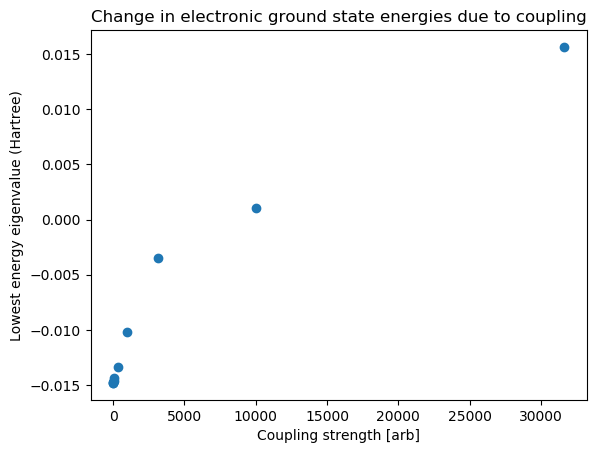

PyObject Text(0.5, 1.0, 'Change in electronic ground state energies due to coupling')

In [197]:
plot(strengths,gs_energies,marker="o",linewidth=0)
xlabel("Coupling strength [arb]")
ylabel("Lowest energy eigenvalue (Hartree)")
title("Change in electronic ground state energies due to coupling")

In [ ]:
#### I: With a cavity

## Example III: Finding the change in the electron density and the electromagnetic field due to coupling of matter with quantized electromagnetic fields -- mean field method.

### One-dimensional example

In [200]:
N_el_l = 200;
R = 8;
xgrid = -R:(2*R)/(N_el_l-1):R
Δx = (2*R)/(N_el_l-1);
V = 0.5*10*(xgrid).^2+0.005*(xgrid).^3+0.0001*(xgrid).^4;
H = SymTridiagonal((1/Δx)^2*2*ones(N_el_l)+V,-(1/Δx)^2*ones(N_el_l-1))
F = eigen(H);
tmp1 = reshape(F.vectors,(N_el_l.^2,1));
tmp2 = reshape(F.values,(N_el_l,1));
X = [tmp1
    tmp2];
electron_1d = electronic_r(N_el_l,N_el_l-1,H,Diagonal(xgrid),X);

N_cav = 100;
d_cav = 1; # spatial dimension of the cavity mode, corresponds to number of vector components used to describe mode 
L_cav = 18904.0; # 1 micron in atomic units
S_cav = (10.0*nm)^2; #area of cavity

emitter_pos = L_cav/2; # position where the emitter is located

freqs_cav = pi*(1:N_cav)*c/L_cav;
modes_cav = zeros(d_cav,N_cav);
for counter = 1:N_cav
   modes_cav[1,counter] = sqrt(2.0/L_cav/S_cav)*sin(freqs_cav[counter]*emitter_pos/c); # for 2d or 3d, want two extra lines specifying those components 
end

pt_cav = photonic(N_cav,d_cav,freqs_cav,modes_cav)

E = electron_1d;
P = pt_cav;
X0 = electron_1d.X
str = 100000;
#print("$(real(E.X[end-E.N+1:end])) \n")

In [201]:
sol_el= fixedpoint(f_el_meanfield!, X0; method = :anderson, m=0,beta=1.0,iterations=10);

[2.23406, 6.69816, 11.1542, 15.6022, 20.042, 24.4737, 28.8973, 33.3127, 37.7199, 42.1189, 46.5096, 50.8921, 55.2663, 59.6321, 63.9896, 68.3387, 72.6794, 77.0118, 81.3356, 85.651, 89.9579, 94.2562, 98.546, 102.827, 107.1, 111.364, 115.619, 119.866, 124.103, 128.333, 132.553, 136.764, 140.967, 145.161, 149.346, 153.521, 157.688, 161.846, 165.995, 170.135, 174.266, 178.387, 182.5, 186.603, 190.697, 194.782, 198.857, 202.923, 206.98, 211.027, 215.065, 219.093, 223.112, 227.121, 231.121, 235.11, 239.091, 243.061, 247.022, 250.973, 254.914, 258.845, 262.766, 266.678, 270.579, 274.472, 278.355, 282.229, 286.097, 289.96, 293.82, 297.683, 301.552, 305.434, 309.336, 313.263, 317.221, 321.214, 325.247, 329.32, 333.435, 337.591, 341.787, 346.021, 350.291, 354.595, 358.931, 363.297, 367.69, 372.108, 376.548, 381.01, 385.49, 389.987, 394.499, 399.023, 403.559, 408.104, 412.656, 417.214, 421.777, 426.341, 430.907, 435.471, 440.033, 444.591, 449.142, 453.687, 458.223, 462.748, 467.261, 471.76, 476.245

[2.23406, 6.69816, 11.1542, 15.6022, 20.042, 24.4737, 28.8973, 33.3127, 37.7199, 42.1189, 46.5096, 50.8921, 55.2663, 59.6321, 63.9896, 68.3387, 72.6794, 77.0118, 81.3356, 85.651, 89.9579, 94.2562, 98.546, 102.827, 107.1, 111.364, 115.619, 119.866, 124.103, 128.333, 132.553, 136.764, 140.967, 145.161, 149.346, 153.521, 157.688, 161.846, 165.995, 170.135, 174.266, 178.387, 182.5, 186.603, 190.697, 194.782, 198.857, 202.923, 206.98, 211.027, 215.065, 219.093, 223.112, 227.121, 231.121, 235.11, 239.091, 243.061, 247.022, 250.973, 254.914, 258.845, 262.766, 266.678, 270.579, 274.472, 278.355, 282.229, 286.097, 289.96, 293.82, 297.683, 301.552, 305.434, 309.336, 313.263, 317.221, 321.214, 325.247, 329.32, 333.435, 337.591, 341.787, 346.021, 350.291, 354.595, 358.931, 363.297, 367.69, 372.108, 376.548, 381.01, 385.49, 389.987, 394.499, 399.023, 403.559, 408.104, 412.656, 417.214, 421.777, 426.341, 430.907, 435.471, 440.033, 444.591, 449.142, 453.687, 458.223, 462.748, 467.261, 471.76, 476.245

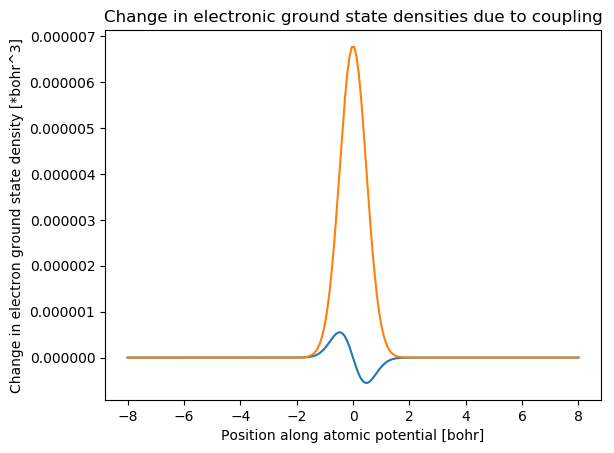

PyObject Text(0.5, 1.0, 'Change in electronic ground state densities due to coupling')

In [207]:
plot(xgrid,(sol_el.zero[1:N_el_l].^2 - X0[1:N_el_l].^2),xgrid,X0[1:N_el_l].^2/10000)
xlabel("Position along atomic potential [bohr]")
ylabel("Change in electron ground state density [*bohr^3]")
title("Change in electronic ground state densities due to coupling")

### Two-dimensional example

In [220]:
N_el_l = 50;
R = 8;
xgrid = -R:(2*R)/(N_el_l-1):R
Δx = (2*R)/(N_el_l-1);
V = 0.5*10*(xgrid).^2+0.5*(xgrid).^3+0.01*(xgrid).^4;
Tx = SymTridiagonal((1/Δx)^2*2*ones(N_el_l),-(1/Δx)^2*ones(N_el_l-1));
rsep = kron(Diagonal(xgrid),Diagonal(ones(N_el_l)))
Hsep=kron(Tx,Diagonal(ones(N_el_l)))+kron(Diagonal(ones(N_el_l)),Tx)+kron(Diagonal(V),Diagonal(ones(N_el_l)))
Hsep=sparse(Hsep)

2500×2500 SparseMatrixCSC{Float64,Int64} with 12300 stored entries:
  [1   ,    1]  =  142.476
  [2   ,    1]  =  -9.37891
  [51  ,    1]  =  -9.37891
  [1   ,    2]  =  -9.37891
  [2   ,    2]  =  142.476
  [3   ,    2]  =  -9.37891
  [52  ,    2]  =  -9.37891
  [2   ,    3]  =  -9.37891
  [3   ,    3]  =  142.476
  [4   ,    3]  =  -9.37891
  [53  ,    3]  =  -9.37891
  [3   ,    4]  =  -9.37891
  ⋮
  [2498, 2497]  =  -9.37891
  [2448, 2498]  =  -9.37891
  [2497, 2498]  =  -9.37891
  [2498, 2498]  =  654.476
  [2499, 2498]  =  -9.37891
  [2449, 2499]  =  -9.37891
  [2498, 2499]  =  -9.37891
  [2499, 2499]  =  654.476
  [2500, 2499]  =  -9.37891
  [2450, 2500]  =  -9.37891
  [2499, 2500]  =  -9.37891
  [2500, 2500]  =  654.476

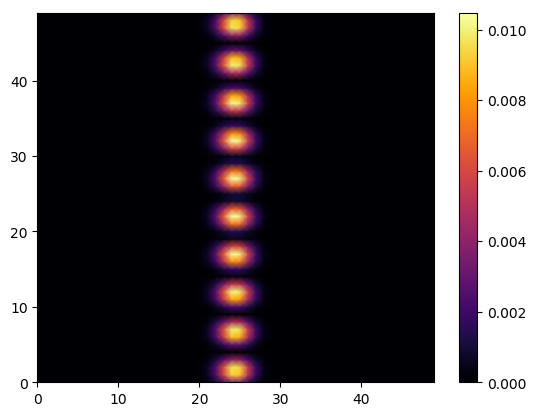

PyObject <matplotlib.colorbar.Colorbar object at 0x7f959586f710>

In [330]:
D,V = eigs(Hsep,which=:SM,nev=10)
tmp1 = reshape(V,(N_el_l^2*10,1));
tmp2 = reshape(D,(10,1));
X0 = [tmp1
    tmp2];
pcolormesh(reshape(V[:,10],(N_el_l,N_el_l)).^2,cmap="inferno",shading="gouraud")
colorbar()

In [222]:
electron_2d = electronic_r(N_el_l^2,10,Hsep,rsep,X0)
E = electron_2d;
P = pt_cav;
X0 = electron_2d.X
str = 100000;
#print("$(real(E.X[end-E.N+1:end])) \n")

sol_el= fixedpoint(f_el_meanfield!, X0; method = :anderson, m=0,beta=1.0,iterations=20);

[2.23244, 2.33903, 2.51625, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00646, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 2.33903, 2.51624, 2.7634, 3.07956, 3.46353, 3.91385, 4.42881, 5.00645, 5.6446] 
[2.23243, 

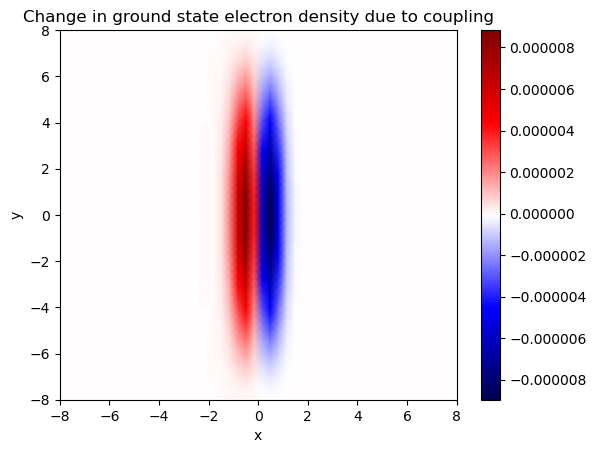

PyObject Text(0.5, 1.0, 'Change in ground state electron density due to coupling')

In [243]:
pcolormesh(xgrid,xgrid,reshape(sol_el.zero[1:2500],(50,50)).^2-reshape(X0[1:2500],(50,50)).^2,cmap="seismic",shading="gouraud")
colorbar()
xlabel("x")
ylabel("y")
title("Change in ground state electron density due to coupling")

#### Studying the changes in the fields in the mean-field approximation

In [307]:
alphas=scf_photon_meanfield(electron_2d,pt_cav);

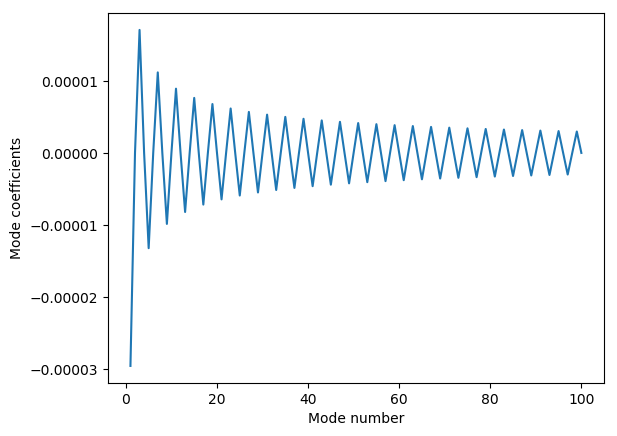

PyObject Text(24.0, 0.5, 'Mode coefficients')

In [312]:
plot(1:100,reshape(alphas,(100,1)))
xlabel("Mode number")
ylabel("Mode coefficients")